In [1]:
import pandas as pd 
import datetime as dt 
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import urllib
import bs4 as bs
%matplotlib inline

In [2]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")

In [3]:
tickers = tickers[0]["Symbol"]

In [4]:
%%time
df = pd.DataFrame()
for t in tickers:
    if dt.datetime.today().weekday() == 0:
        try:
            df[t] = web.get_data_yahoo(t,start=dt.datetime.today().date()-dt.timedelta(days=3))["Adj Close"]
        except:
            df[t] = np.nan
    else:
        try:
            df[t] = web.get_data_yahoo(t,start=dt.datetime.today().date()-dt.timedelta(days=1))["Adj Close"]
        except:
            df[t] = np.nan
        


Wall time: 6min 29s


In [5]:
df.dropna(axis=1,inplace=True)

In [6]:
returns = pd.DataFrame()
for c in df.columns:
    returns[c] = np.log(df[c]).diff()

In [7]:
today_returns = returns.dropna().T

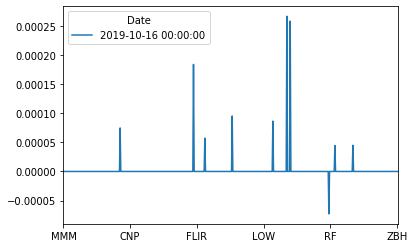

In [28]:
today_returns.plot()

In [15]:
top5 = today_returns.sort_values(today_returns.columns[0],ascending=False)[:5]

In [16]:
top5.index

Index(['MYL', 'NWL', 'FITB', 'INTC', 'MXIM'], dtype='object')

In [17]:
import smtplib as smtp

In [18]:
server = smtp.SMTP("smtp.gmail.com:587")

In [19]:
server.starttls()

(220, b'2.0.0 Ready to start TLS')

In [20]:
server.login("ricardofilipelealcorreia@gmail.com","*****")

(235, b'2.7.0 Accepted')

In [21]:
fromadr = "ricardofilipelealcorreia@gmail.com"

In [22]:
toadr = "ricardofilipelealcorreia@gmail.com"

In [23]:
subject = "Today's S&P500 Best Performers"

In [24]:
body = "https://finance.yahoo.com/quote/"+top5.index.values[0]+"\n"+"https://finance.yahoo.com/quote/"+top5.index.values[1]+"\n"+"https://finance.yahoo.com/quote/"+top5.index.values[2]+"\n"+"https://finance.yahoo.com/quote/"+top5.index.values[3]+"\n"+"https://finance.yahoo.com/quote/"+top5.index.values[4]

In [25]:
msg = "Subject: " + subject + "\n\n " + body

In [26]:
server.sendmail(fromadr,toadr,msg)

{}

In [ ]:
server.quit()